### v1: scaler used is MinMaxScaler

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import jupyterthemes as jt
jt.jtplot.style(theme = 'grade3', context = 'paper', ticks=True, grid = False)

In [4]:
zee = pd.read_csv('Zee.csv', header = 0)
zee.head(5)

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,...,45.4315,1.4706,-1.1630,1,EB,0.0008,0.000,0.0000,1.0190,0.0000
1,163286,109275715,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,...,60.5754,-0.4896,1.0496,-1,EB,0.0112,0.000,0.7185,1.8461,0.0000
2,163286,109075352,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,...,45.2954,-2.0401,3.1187,1,EE,0.0260,0.028,15.2170,4.5337,3.8370
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,...,45.9013,1.1561,2.4786,-1,EB,0.0086,0.000,0.0000,2.4388,0.5676
4,163286,108947653,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,...,34.8931,-2.2444,0.6106,-1,EE,0.0290,0.000,12.4229,0.4534,0.9096


In [5]:
zee.columns

Index(['Run', 'Event', 'pt1', 'eta1', 'phi1', 'Q1', 'type1', 'sigmaEtaEta1',
       'HoverE1', 'isoTrack1', 'isoEcal1', 'isoHcal1', 'pt2', 'eta2', 'phi2',
       'Q2', 'type2', 'sigmaEtaEta2', 'HoverE2', 'isoTrack2', 'isoEcal2',
       'isoHcal2'],
      dtype='object')

In [6]:
zee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Run             10000 non-null int64
Event           10000 non-null int64
pt1             10000 non-null float64
eta1            10000 non-null float64
phi1            10000 non-null float64
Q1              10000 non-null int64
type1           10000 non-null object
sigmaEtaEta1    10000 non-null float64
HoverE1         10000 non-null float64
isoTrack1       10000 non-null float64
isoEcal1        10000 non-null float64
isoHcal1        10000 non-null float64
pt2             10000 non-null float64
eta2            10000 non-null float64
phi2            10000 non-null float64
Q2              10000 non-null int64
type2           10000 non-null object
sigmaEtaEta2    10000 non-null float64
HoverE2         10000 non-null float64
isoTrack2       10000 non-null float64
isoEcal2        10000 non-null float64
isoHcal2        10000 non-null float64
dtypes: float64(16), int64(4), object(2)
mem

In [7]:
### dropping Run and Event
zee.drop(columns=['Run', 'Event'], inplace = True);

In [8]:
zee.head(5)

,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,isoEcal1,isoHcal1,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,0.5329,0.6423,45.4315,1.4706,-1.1630,1,EB,0.0008,0.000,0.0000,1.0190,0.0000
1,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,1.4970,0.6402,60.5754,-0.4896,1.0496,-1,EB,0.0112,0.000,0.7185,1.8461,0.0000
2,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,5.0077,3.9249,45.2954,-2.0401,3.1187,1,EE,0.0260,0.028,15.2170,4.5337,3.8370
3,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,1.9670,0.5429,45.9013,1.1561,2.4786,-1,EB,0.0086,0.000,0.0000,2.4388,0.5676
4,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,4.8691,0.0000,34.8931,-2.2444,0.6106,-1,EE,0.0290,0.000,12.4229,0.4534,0.9096


### Exploratory Data Analysis

In [9]:
zee.pivot_table(index = ['type1', 'type2'], values = ['Q1', 'Q2'], aggfunc= len) # or np.size

Q1    Q2
type1 type2            
EB    EB     4981  4981
      EE     2608  2608
EE    EB     1139  1139
      EE     1272  1272

In [10]:
zee.pivot_table(index = ['type1', 'type2','Q1'], values = ['Q2'], aggfunc= len) # or np.size

Q2
type1 type2 Q1      
EB    EB    -1  2469
             1  2512
      EE    -1  1245
             1  1363
EE    EB    -1   556
             1   583
      EE    -1   632
             1   640

In [11]:
zee.pivot_table(index = ['type1', 'type2', 'Q1','Q2'], values = ['pt1', 'eta1'], aggfunc= np.size)

eta1     pt1
type1 type2 Q1 Q2                
EB    EB    -1 -1   523.0   523.0
                1  1946.0  1946.0
             1 -1  1947.0  1947.0
                1   565.0   565.0
      EE    -1 -1   327.0   327.0
                1   918.0   918.0
             1 -1  1028.0  1028.0
                1   335.0   335.0
EE    EB    -1 -1   154.0   154.0
                1   402.0   402.0
             1 -1   417.0   417.0
                1   166.0   166.0
      EE    -1 -1   170.0   170.0
                1   462.0   462.0
             1 -1   471.0   471.0
                1   169.0   169.0

In [12]:
groupby_charge = zee.groupby(['Q1', 'Q2'])

In [13]:
groupby_charge.describe()

pt1                                                                 \
        count       mean        std      min        25%       50%        75%   
Q1 Q2                                                                          
-1 -1  1174.0  38.034097  11.756094  25.0248  29.151950  35.07195  43.604975   
    1  3728.0  40.408350  11.067131  25.0170  32.553675  39.46325  45.427150   
 1 -1  3863.0  40.372171  11.733574  25.0054  32.691800  39.02430  45.132550   
    1  1235.0  38.014566  12.230886  25.0030  29.322050  34.88620  42.838150   

                  eta1            ...  isoEcal2          isoHcal2            \
           max   count      mean  ...       75%      max    count      mean   
Q1 Q2                             ...                                         
-1 -1  149.250  1174.0 -0.021017  ...  9.112825  35.9749   1174.0  3.645292   
    1  186.014  3728.0 -0.018164  ...  3.967350  66.6093   3728.0  1.666903   
 1 -1  252.099  3863.0  0.005269  ...  3.783200  74.7395   3863.0  1.665963   
    1  145.452  1235.0  0.024029  ...  8.983900  47.7144   1235.0  3.723662   

                                                            
            std  min       25%      50%       75%      max  
Q1 Q2                                                       
-1 -1  3.795617  0.0  0.921725  2.58360  5.115225  31.5944  
    1  2.824500  0.0  0.000000  0.68105  1.999750  37.3288  
 1 -1  2.739169  0.0  0.000000  0.67430  2.017450  40.5488  
    1  4.190901  0.0  0.995950  2.71800  5.322750  72.4930  

[4 rows x 128 columns]

    * The count column shows the number of decays leading to the same type of the particles is lower than the decays causing oppositely charged particles

In [14]:
groupby_type = zee.groupby(['type1', 'type2'])
groupby_type.describe()

pt1                                                      \
              count       mean        std      min        25%       50%   
type1 type2                                                               
EB    EB     4981.0  40.940222  11.793527  25.0030  32.790000  39.70470   
      EE     2608.0  36.696889  10.207767  25.0235  29.803450  34.87025   
EE    EB     1139.0  39.182802  11.216267  25.0301  31.074300  37.46690   
      EE     1272.0  42.407312  12.450284  25.0384  34.643925  41.84015   

                                  eta1            ...  isoEcal2           \
                  75%      max   count      mean  ...       75%      max   
type1 type2                                       ...                      
EB    EB     46.03560  186.014  4981.0 -0.007934  ...  7.156700  74.7395   
      EE     40.84890  179.268  2608.0  0.024283  ...  3.102125  48.9473   
EE    EB     44.03375  120.173  1139.0  0.053340  ...  7.990600  70.6613   
      EE     47.51630  252.099  1272.0 -0.099782  ...  3.044275  25.6824   

            isoHcal2                                                       \
               count      mean       std  min      25%      50%       75%   
type1 type2                                                                 
EB    EB      4981.0  2.051182  3.525667  0.0  0.00000  0.70190  2.618400   
      EE      2608.0  2.241993  2.885401  0.0  0.39800  1.23355  3.077925   
EE    EB      1139.0  2.261755  3.314473  0.0  0.00000  0.79140  3.209800   
      EE      1272.0  2.270386  2.590340  0.0  0.47045  1.38830  3.127875   

                      
                 max  
type1 type2           
EB    EB     72.4930  
      EE     37.3288  
EE    EB     23.0844  
      EE     21.4493  

[4 rows x 144 columns]

In [15]:
groupby_charge.ngroup()

0       1
1       2
2       1
3       2
4       2
       ..
9995    2
9996    2
9997    1
9998    2
9999    0
Length: 10000, dtype: int64

In [16]:
np.unique(groupby_charge.ngroup())

array([0, 1, 2, 3])

In [17]:
groupby_charge_type = zee.groupby(by = ['Q1','Q2','type1','type2'])
groupby_charge_type.describe()

pt1                                                      \
                    count       mean        std      min        25%       50%   
Q1 Q2 type1 type2                                                               
-1 -1 EB    EB      523.0  38.242272  12.423759  25.0460  29.172750  35.23130   
            EE      327.0  35.766123  10.197252  25.0248  28.310750  33.12020   
      EE    EB      154.0  39.812104  12.212276  25.0334  29.503000  36.82315   
            EE      170.0  40.145501  11.377922  25.1101  31.733275  39.02825   
    1 EB    EB     1946.0  41.745075  11.811937  25.0170  33.897500  40.86875   
            EE      918.0  36.814375   9.642887  25.0754  30.087650  35.25675   
      EE    EB      402.0  39.139697   9.521900  25.0850  32.261475  38.31130   
            EE      462.0  43.023073   9.808700  25.0384  36.805975  43.06795   
 1 -1 EB    EB     1947.0  41.594887  11.170010  25.0054  34.591400  40.56800   
            EE     1028.0  37.148969  10.336164  25.0235  30.427575  35.70460   
      EE    EB      417.0  39.303290  11.920153  25.0301  31.368600  37.62860   
            EE      471.0  43.299019  14.729808  25.0716  36.091350  42.09110   
    1 EB    EB      565.0  38.409512  12.518986  25.0030  29.351300  35.03140   
            EE      335.0  35.896207  11.218775  25.0515  28.357600  33.57390   
      EE    EB      166.0  38.400708  12.237850  25.1303  29.890100  35.10100   
            EE      169.0  40.514013  12.626991  25.1531  31.880900  38.70180   

                                          eta1            ...   isoEcal2  \
                         75%       max   count      mean  ...        75%   
Q1 Q2 type1 type2                                         ...              
-1 -1 EB    EB     42.958150  149.2500   523.0 -0.013016  ...  11.431150   
            EE     39.514550  104.4230   327.0  0.011729  ...   5.173900   
      EE    EB     46.841950   81.8070   154.0  0.001253  ...  11.149775   
            EE     46.058700   89.9344   170.0 -0.128798  ...   4.261175   
    1 EB    EB     46.449575  186.0140  1946.0 -0.005761  ...   4.871450   
            EE     41.044125  110.9760   918.0 -0.009584  ...   2.789750   
      EE    EB     43.523575   81.3910   402.0  0.023201  ...   5.818700   
            EE     47.864950  112.0870   462.0 -0.123447  ...   2.383500   
 1 -1 EB    EB     46.267050  153.3910  1947.0 -0.005740  ...   4.669050   
            EE     41.139475  179.2680  1028.0  0.032519  ...   2.504725   
      EE    EB     43.911800  120.1730   417.0  0.056804  ...   6.603400   
            EE     47.928800  252.0990   471.0 -0.054320  ...   2.366300   
    1 EB    EB     43.774600  145.4520   565.0 -0.018275  ...  11.734200   
            EE     39.907450  118.1380   335.0  0.104072  ...   4.303600   
      EE    EB     42.744250   88.6353   166.0  0.165946  ...  10.836425   
            EE     44.202500  101.0600   169.0 -0.132603  ...   4.430700   

                           isoHcal2                                     \
                       max    count      mean       std  min       25%   
Q1 Q2 type1 type2                                                        
-1 -1 EB    EB     35.9749    523.0  3.726014  4.001613  0.0  0.763500   
            EE     35.5448    327.0  3.596285  3.905822  0.0  1.073650   
      EE    EB     32.6479    154.0  3.847919  3.441243  0.0  1.100650   
            EE     19.2366    170.0  3.307662  3.195141  0.0  1.183450   
    1 EB    EB     66.6093   1946.0  1.599792  3.104805  0.0  0.000000   
            EE     18.4889    918.0  1.763607  2.464527  0.0  0.320250   
      EE    EB     28.3076    402.0  1.602250  2.917715  0.0  0.000000   
            EE     15.1088    462.0  1.813685  2.067907  0.0  0.335175   
 1 -1 EB    EB     74.7395   1947.0  1.467399  2.900727  0.0  0.000000   
            EE     48.9473   1028.0  1.880255  2.484343  0.0  0.312500   
      EE    EB     70.6613    417.0  1.789327  3.079148  0.0  0.000000   
 

    * There could be 16 clusters possible

### Data Preprocessing

In [18]:
zee_edited = zee.drop(columns = ['Q1','Q2', 'type1', 'type2'])

In [19]:
zee_edited.columns

Index(['pt1', 'eta1', 'phi1', 'sigmaEtaEta1', 'HoverE1', 'isoTrack1',
       'isoEcal1', 'isoHcal1', 'pt2', 'eta2', 'phi2', 'sigmaEtaEta2',
       'HoverE2', 'isoTrack2', 'isoEcal2', 'isoHcal2'],
      dtype='object')

In [20]:
zee_edited.mean()

pt1             39.820004
eta1            -0.004236
phi1            -0.011530
sigmaEtaEta1     0.012418
HoverE1          0.023591
isoTrack1        5.809642
isoEcal1         4.678145
isoHcal1         2.236042
pt2             41.376158
eta2             0.008657
phi2             0.028482
sigmaEtaEta2     0.014082
HoverE2          0.020239
isoTrack2        5.291606
isoEcal2         4.303183
isoHcal2         2.152813
dtype: float64

In [21]:
zee_edited.std()

pt1             11.598636
eta1             1.207731
phi1             1.818831
sigmaEtaEta1     0.005824
HoverE1          0.041234
isoTrack1        9.850592
isoEcal1         4.885182
isoHcal1         3.344397
pt2             12.085252
eta2             1.437133
phi2             1.813896
sigmaEtaEta2     0.007175
HoverE2          0.037990
isoTrack2        9.414047
isoEcal2         4.732648
isoHcal2         3.236533
dtype: float64

#### Checking the sparsity of the data

In [22]:
zee_edited[zee_edited == 0].count()

pt1                0
eta1               0
phi1               0
sigmaEtaEta1       0
HoverE1         5783
isoTrack1       4692
isoEcal1          16
isoHcal1        3338
pt2                0
eta2               0
phi2               0
sigmaEtaEta2       0
HoverE2         5686
isoTrack2       5015
isoEcal2          37
isoHcal2        2967
dtype: int64

In [23]:
# OR
zee_edited.apply(np.count_nonzero)

pt1             10000
eta1            10000
phi1            10000
sigmaEtaEta1    10000
HoverE1          4217
isoTrack1        5308
isoEcal1         9984
isoHcal1         6662
pt2             10000
eta2            10000
phi2            10000
sigmaEtaEta2    10000
HoverE2          4314
isoTrack2        4985
isoEcal2         9963
isoHcal2         7033
dtype: int64

    * Some of the columns have significant sparsity in the data

#### Converting the qualitative predictors to quantitative/categorical values

In [24]:
pd.get_dummies(zee[['Q1','Q2','type1', 'type2']], dtype=np.float32)

,Q1,Q2,type1_EB,type1_EE,type2_EB,type2_EE
0,-1,1,0.0,1.0,1.0,0.0
1,1,-1,1.0,0.0,1.0,0.0
2,-1,1,1.0,0.0,0.0,1.0
3,1,-1,1.0,0.0,1.0,0.0
4,1,-1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
9995,1,-1,0.0,1.0,1.0,0.0
9996,1,-1,1.0,0.0,1.0,0.0
9997,-1,1,1.0,0.0,0.0,1.0
9998,1,-1,1.0,0.0,1.0,0.0


In [25]:
from sklearn.preprocessing import OneHotEncoder

##### Charge

In [26]:
# cant use this - minmax_charge = MinMaxScaler() - since the charge is not ordinal
onehot_charge = OneHotEncoder(categories='auto')
enc_charge = onehot_charge.fit(zee[['Q1']])

In [27]:
enc_charge.categories_

[array([-1,  1])]

In [28]:
enc_charge_q1 = enc_charge.transform(zee[['Q1']])
enc_charge_q2 = enc_charge.transform(zee[['Q2']])

In [29]:
enc_charge_q1.toarray()[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [30]:
enc_charge_q2.toarray()[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [31]:
zee[['Q1','Q2']].head(5)

,Q1,Q2
0,-1,1
1,1,-1
2,-1,1
3,1,-1
4,1,-1


##### Type

In [32]:
onehot_type = OneHotEncoder()

In [33]:
enc_type = onehot_type.fit(zee[['type1']])

In [34]:
enc_type1 = enc_type.transform(zee[['type1']])
enc_type2 = enc_type.transform(zee[['type2']])

In [35]:
enc_type1.toarray()[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [36]:
enc_type2.toarray()[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [37]:
zee[['type1', 'type2']].head(5)

,type1,type2
0,EE,EB
1,EB,EB
2,EB,EE
3,EB,EB
4,EB,EE


In [38]:
# zee_edited = pd.concat([zee_edited, pd.get_dummies(zee[['Q1','Q2','type1', 'type2']], dtype=np.float32)], axis=1)

#### Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
minmaxscaler = MinMaxScaler()


In [41]:
minmaxscaled_data = minmaxscaler.fit(zee_edited)

In [42]:
scaled_traindata = minmaxscaled_data.transform(zee_edited)

##### Cross-checking if there has been no shuffling to ensure data integrity when concatenating with caterogical part of the data

In [43]:
scaled_traindata.shape

(10000, 16)

In [44]:
np.apply_along_axis(np.mean, arr= scaled_traindata, axis=0)

array([0.06524555, 0.49490001, 0.49819663, 0.19336716, 0.02067204,
       0.01727713, 0.0587396 , 0.05699506, 0.08769942, 0.50395667,
       0.50443872, 0.18931429, 0.01588615, 0.02573576, 0.05757576,
       0.02969683])

In [45]:
scaled_traindata[0]

array([0.0553233 , 0.93651436, 0.8267333 , 0.40264026, 0.00788644,
       0.        , 0.00669118, 0.01637176, 0.10941876, 0.78329989,
       0.31476057, 0.00686813, 0.        , 0.        , 0.01363402,
       0.        ])

In [46]:
minmaxscaled_data.inverse_transform(scaled_traindata[0].reshape(1,-1))

array([[ 3.75667e+01,  2.28920e+00,  2.05260e+00,  2.51000e-02,
         9.00000e-03,  0.00000e+00,  5.32900e-01,  6.42300e-01,
         4.54315e+01,  1.47060e+00, -1.16300e+00,  8.00000e-04,
         0.00000e+00,  0.00000e+00,  1.01900e+00,  0.00000e+00]])

In [47]:
zee_edited.iloc[0,:].values

array([ 3.75667e+01,  2.28920e+00,  2.05260e+00,  2.51000e-02,
        9.00000e-03,  0.00000e+00,  5.32900e-01,  6.42300e-01,
        4.54315e+01,  1.47060e+00, -1.16300e+00,  8.00000e-04,
        0.00000e+00,  0.00000e+00,  1.01900e+00,  0.00000e+00])

    * Matches

##### Concatenating numerical and categorical values

In [48]:
enc_charge_q1.toarray().shape

(10000, 2)

In [49]:
scaled_traindata = np.column_stack((scaled_traindata, enc_charge_q1.toarray(), enc_charge_q2.toarray(), 
                                    enc_type1.toarray(), enc_type2.toarray()))
scaled_traindata.shape

(10000, 24)

### Unsupervised Learning without Dimension Reduction using KMeans

In [50]:
from sklearn.cluster import KMeans

    * Starting with 4 clusters based on the 4 combinations of the 'type' characteristic of the data

In [51]:
kmeans = KMeans(n_clusters=4)

In [52]:
kmeans.fit(scaled_traindata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([1996, 3079, 3041, 1884]))

In [54]:
predicted_values = kmeans.predict(scaled_traindata)

In [55]:
predicted_values.shape

(10000,)

### Plotting function

    * PCA will be used to reduce the dimensions and the data will be plotted

In [56]:
from sklearn.decomposition import PCA

In [57]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D # need to import this to plot 3D plots

In [58]:
def plot_func(data, predicted_values, figsize = (10,6), text = 'Title', text_loc = (0.1,0.3)):
    
    # pca = 2
    reduced_2d = PCA(n_components=2, whiten=True).fit_transform(data)
    
    # pca = 3
    reduced_3d = PCA(n_components=3, whiten=True).fit_transform(data)
    
    cluster_labels = np.unique(predicted_values)
    
    fig = plt.figure(figsize=figsize)
    gridspec.GridSpec(2,3) # for plotting subplots of different sizes
    
    # 2D plot
    # ax2d = fig.add_subplot(121)    
    ax2d = plt.subplot2grid((2,3), (0,0))
    for i in cluster_labels:
        ax2d.scatter(reduced_2d[predicted_values==i,0],reduced_2d[predicted_values==i,1])
    ax2d.set_xlabel('PCA comp. 1')
    ax2d.set_ylabel('PCA comp. 2')

        
    # 3D plot
    # ax3d = fig.add_subplot(122, projection = '3d')    
    ax3d = plt.subplot2grid((2,3), (0,1), rowspan=2, colspan=2, projection = '3d')
    # spanning the dimensions of 2 rows and 2 columns
    for i in cluster_labels:
        ax3d.scatter(reduced_3d[predicted_values==i,0],reduced_3d[predicted_values==i,1], reduced_3d[predicted_values==i,2])
    
    ax3d.set_xlabel('PCA comp. 1')
    ax3d.set_ylabel('PCA comp. 2')
    ax3d.set_zlabel('PCA comp. 3')
    
    text_x, text_y = text_loc
    fig.text(x = text_x, y=text_y, s= text, fontsize = 16)
    fig.tight_layout()
    
    plt.show()    

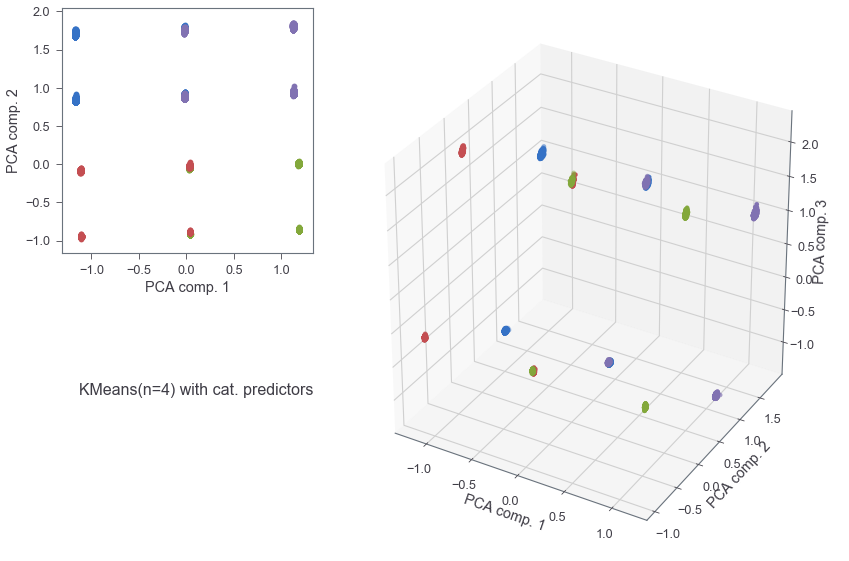

In [59]:
plot_func(scaled_traindata, predicted_values, figsize=(12,8), text = 'KMeans(n=4) with cat. predictors')

    * PCA shows 16 clusters as seen in the 2D, 3D plot.

#### Elbow Method for optimal clusters with data including the categorical predictors

In [60]:
distortion = []

for i in range(1,25,1):
    kmeans =KMeans(n_clusters=i)
    kmeans.fit(scaled_traindata)
    distortion.append(kmeans.inertia_)

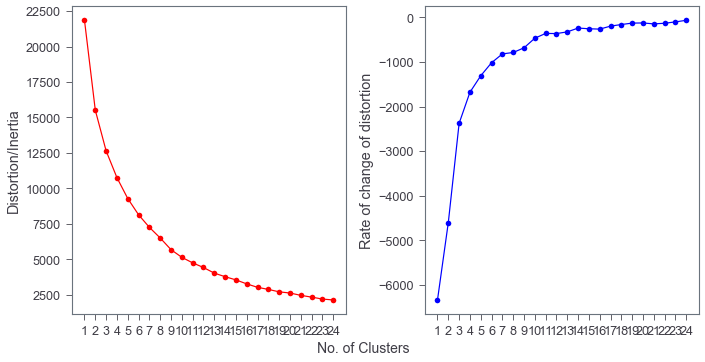

In [61]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, sharex = True, figsize=(10,5))
ax1[0].plot(range(1,25,1), distortion, marker = 'o', color = 'red')
ax1[1].plot(range(1,25,1), np.gradient(distortion, range(1,25,1)), marker = 'o', color = 'blue')
# ax1[0].set_xlabel('No. of Clusters')
# ax1[0].xaxis.set_label_coords(1.3, -0.1)
ax1[0].set_ylabel('Distortion/Inertia')
ax1[1].set_ylabel('Rate of change of distortion')
[i.set_xticks(range(1,25,1)) for i in ax1]
fig1.text(x = 0.45, y = 0, s='No. of Clusters', fontsize = 14)
fig1.tight_layout()
plt.show()

    * It appears that 2 or 3 clusters are optimal from the gradient 

#### Silhouette Analysis for quantifying the quality of clustering 

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
import matplotlib.cm as cm

In [64]:
def silhouette_plot(data, predicted_values, title = 'Title'):
    
    sil_values = silhouette_samples(data, predicted_values)
    cluster_labels = np.unique(predicted_values)
    
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_sil_vals = sil_values[predicted_values == c]
        c_sil_vals.sort()

        y_ax_upper += len(c_sil_vals)

        color =  cm.jet(i/len(cluster_labels))
        plt.barh(range(y_ax_lower, y_ax_upper), c_sil_vals, height=1.0, edgecolor=None, color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower += len(c_sil_vals)
    sil_values_mean = np.mean(sil_values)
    plt.axvline(sil_values_mean, color = 'red', linestyle='--')
    plt.yticks(yticks, labels = cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.title(title)
    plt.show()

#### Data including the categorical predictors

##### 4 clusters

In [65]:
# this is same as the mean calculated in the above function
sil_scores = dict()
sil_scores['sil_4_cat'] = silhouette_score(scaled_traindata, predicted_values)

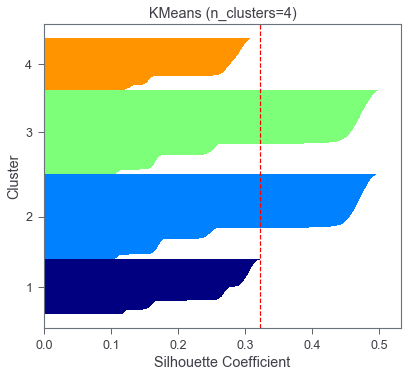

In [66]:
silhouette_plot(data = scaled_traindata, predicted_values=predicted_values, title = 'KMeans (n_clusters=4)')

    * Clusters of unequal sizes

##### Finding common elements between the clusters

##### *Testing*

In [67]:
from functools import reduce

In [68]:
reduce(np.intersect1d, [np.unique(scaled_traindata[:,16:][predicted_values==i], axis=0) for i in range(4)])

array([0., 1.])

##### *End Testing*

In [69]:
np.vstack([np.unique(scaled_traindata[:,16:][predicted_values==i], axis=0) for i in range(4)]).shape

(16, 8)

In [152]:
# The unique values of the above should give all particle charge and type combinations
np.unique(np.vstack([np.unique(scaled_traindata[:,16:][predicted_values==i], axis=0) for i in range(4)]), axis=1).shape[0]
# if value is equal to 16, no common particle charge and type combination between the clusters

16

    * The clusters are unique, i.e. have particles of only one type of charge and type combination.

##### Finding common elements within the clusters

In [71]:
enc_charge.categories_

[array([-1,  1])]

In [72]:
enc_charge.transform(enc_charge.categories_[0].reshape(-1,1)).toarray()

array([[1., 0.],
       [0., 1.]])

In [73]:
enc_type.categories_

[array(['EB', 'EE'], dtype=object)]

In [74]:
enc_type.transform(enc_type.categories_[0].reshape(-1,1)).toarray()

array([[1., 0.],
       [0., 1.]])

In [75]:
np.unique(scaled_traindata[:,16:][predicted_values==0], axis=0, return_counts=True)

(array([[0., 1., 1., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 0., 1.]]), array([ 471, 1028,  170,  327]))

    * all 2nd particles as electron and type 'EE'

In [76]:
np.unique(scaled_traindata[:,16:][predicted_values==1], axis=0, return_counts=True)

(array([[0., 1., 0., 1., 0., 1., 1., 0.],
        [0., 1., 0., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0., 1., 0.]]), array([ 166,  565,  402, 1946]))

    * all 2nd particles as positron and type 'EB'

In [77]:
np.unique(scaled_traindata[:,16:][predicted_values==2], axis=0, return_counts=True)

(array([[0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1., 0., 1., 0.]]), array([ 417, 1947,  154,  523]))

    * all 2nd particles as electron and type 'EB'

In [78]:
np.unique(scaled_traindata[:,16:][predicted_values==3], axis=0, return_counts=True)

(array([[0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 1., 0., 1.],
        [1., 0., 0., 1., 1., 0., 0., 1.]]), array([169, 335, 462, 918]))

    * all 2nd particles as positron and type 'EE'

##### *Testing*

In [79]:
test_lbls = np.unique(scaled_traindata[:,16:][predicted_values==1], axis=0)
test_lbls

array([[0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0.]])

In [80]:
test_lbls[0,:2]

array([0., 1.])

In [81]:
enc_charge.inverse_transform([test_lbls[0,2:4]])

array([[1]])

In [82]:
enc_charge.inverse_transform([test_lbls[0,2:4]]).ravel().tolist()

[1]

In [83]:
test = []
test.append(enc_charge.inverse_transform([test_lbls[0,2:4]]).ravel()[0])
test

[1]

In [84]:
def decode_fn(labels):
    """
    Decodes the categorical labels into the original features    
    """
    cat_list = []
    # charge type
    for i in labels:
        j=0
        for _ in range(len(i)):
            if j<3:
                cat_list.append(enc_charge.inverse_transform([i[j:j+2]]).ravel()[0])
                j=j+2
            elif j<7:
                cat_list.append(enc_type.inverse_transform([i[j:j+2]]).ravel()[0])
                j =j+2
            else:
                break
    return np.array(cat_list).reshape(labels.shape[0],-1)         
    

In [85]:
test_lbls[0].reshape(1,-1)

array([[0., 1., 0., 1., 0., 1., 1., 0.]])

In [86]:
decode_fn(test_lbls[0].reshape(1,-1))

array([['1', '1', 'EE', 'EB']], dtype='<U21')

In [117]:
test_lbls

array([[0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0.]])

In [118]:
decode_fn(test_lbls)

array([['1', '1', 'EE', 'EB'],
       ['1', '1', 'EB', 'EB'],
       ['-1', '1', 'EE', 'EB'],
       ['-1', '1', 'EB', 'EB']], dtype='<U21')

In [119]:
decode_fn(test_lbls).T

array([['1', '1', '-1', '-1'],
       ['1', '1', '1', '1'],
       ['EE', 'EB', 'EE', 'EB'],
       ['EB', 'EB', 'EB', 'EB']], dtype='<U21')

In [120]:
reduce(np.setxor1d,[i for i in decode_fn(test_lbls).T[2]])

array([], dtype='<U2')

In [121]:
reduce(np.intersect1d,[i for i in decode_fn(test_lbls).T[2]])

array([], dtype='<U2')

In [122]:
reduce(np.intersect1d,[i for i in decode_fn(test_lbls).T[2]]).size

0

In [123]:
reduce(np.in1d,[i for i in decode_fn(test_lbls).T[2]])

/home/sameer/datascience/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([False])

In [124]:
reduce(np.in1d,[i for i in decode_fn(test_lbls).T[2]]) == False

/home/sameer/datascience/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([ True])

In [125]:
if reduce(np.in1d,[i for i in decode_fn(test_lbls).T[2]]) == False:
    print(True)

True


/home/sameer/datascience/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [126]:
reduce(np.intersect1d,[i for i in decode_fn(test_lbls).T[1]])

array(['1'], dtype='<U1')

In [127]:
reduce(np.in1d,[i for i in decode_fn(test_lbls).T[1]])

/home/sameer/datascience/lib/python3.6/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([False])

In [128]:
decode_fn(test_lbls)

array([['1', '1', 'EE', 'EB'],
       ['1', '1', 'EB', 'EB'],
       ['-1', '1', 'EE', 'EB'],
       ['-1', '1', 'EB', 'EB']], dtype='<U21')

In [129]:
reduce(np.intersect1d,[i for i in decode_fn(test_lbls).T[1]])

array(['1'], dtype='<U1')

In [130]:
reduce(np.intersect1d,[i for i in decode_fn(test_lbls).T[0]])

array([], dtype='<U2')

In [131]:
[reduce(np.intersect1d,[i for i in j]) for j in  decode_fn(test_lbls).T]
# gives the common elements in the cluster

[array([], dtype='<U2'),
 array(['1'], dtype='<U1'),
 array([], dtype='<U2'),
 array(['EB'], dtype='<U2')]

In [132]:
filter(lambda j: j.size != 0, [reduce(np.intersect1d,[i for i in j]) for j in  decode_fn(test_lbls).T])

In [133]:
list(filter(lambda j: j.size != 0, [reduce(np.intersect1d,[i for i in j]) for j in  decode_fn(test_lbls).T]))

[array(['1'], dtype='<U1'), array(['EB'], dtype='<U2')]

In [134]:
list(map(list, [filter(lambda j: j.size != 0, [reduce(np.intersect1d,[i for i in j]) for j in  decode_fn(test_lbls).T])]))

[[array(['1'], dtype='<U1'), array(['EB'], dtype='<U2')]]

In [135]:
test = [np.unique(scaled_traindata[:,16:][predicted_values==i], axis=0) for i in range(4)]
test = [[reduce(np.intersect1d,[i for i in j]).tolist() for j in decode_fn(label).T] for label in test]
test

[[[], ['-1'], [], ['EE']],
 [[], ['1'], [], ['EB']],
 [[], ['-1'], [], ['EB']],
 [[], ['1'], [], ['EE']]]

    * Once I have the unique elements amongst each cluster, next step is to assign the elements its particle, i.e. 1 or 2

In [136]:
test = [list(map(list, filter(lambda j: j[0] != [], zip(cluster, range(len(cluster)))))) for cluster in test]
test

[[[['-1'], 1], [['EE'], 3]],
 [[['1'], 1], [['EB'], 3]],
 [[['-1'], 1], [['EB'], 3]],
 [[['1'], 1], [['EE'], 3]]]

In [137]:
test.count([])

0

In [138]:
test_dict = dict()
test_dict.update(zip(range(4), ['q1','q2','type1','type2']))
test_dict

{0: 'q1', 1: 'q2', 2: 'type1', 3: 'type2'}

In [139]:
test

[[[['-1'], 1], [['EE'], 3]],
 [[['1'], 1], [['EB'], 3]],
 [[['-1'], 1], [['EB'], 3]],
 [[['1'], 1], [['EE'], 3]]]

In [140]:
test[0][0][0][0]

'-1'

In [141]:
[[test_dict[j[1]], j[0][0]] for j in test[0]]

[['q2', '-1'], ['type2', 'EE']]

In [142]:
[[[test_dict[j[1]], j[0][0]] for j in i] for i in test]

[[['q2', '-1'], ['type2', 'EE']],
 [['q2', '1'], ['type2', 'EB']],
 [['q2', '-1'], ['type2', 'EB']],
 [['q2', '1'], ['type2', 'EE']]]

##### *End Testing*

In [143]:
categories_dict = dict()
categories_dict.update(zip(range(4), ['q1','q2','type1','type2']))
categories_dict

{0: 'q1', 1: 'q2', 2: 'type1', 3: 'type2'}

In [144]:
def common_feature(scaled_data = np.array([]), predicted_values = np.array([]), n_clusters=2):
    
    unique_labels = [np.unique(scaled_data[:,16:][predicted_values==i], axis=0) for i in range(n_clusters)]
    
    common_elems = [[reduce(np.intersect1d,[i for i in j]).tolist() for j in decode_fn(label).T] for label in unique_labels]
    
    common_elems = [list(map(list, filter(lambda j: j[0] != [], zip(cluster, range(len(cluster)))))) 
                    for cluster in common_elems]
    # returns list of empty lists if no common element found
    
    if common_elems.count([]):  
        
        return 'No common particle charge/type combination within the clusters'
    
    return [[[categories_dict[j[1]], j[0][0]] for j in i] for i in common_elems]

In [145]:
common_feature(scaled_traindata, predicted_values,4)

[[['q2', '-1'], ['type2', 'EE']],
 [['q2', '1'], ['type2', 'EB']],
 [['q2', '-1'], ['type2', 'EB']],
 [['q2', '1'], ['type2', 'EE']]]

#### 3 clusters

In [146]:
pred_3_cat = KMeans(n_clusters=3).fit_predict(scaled_traindata)

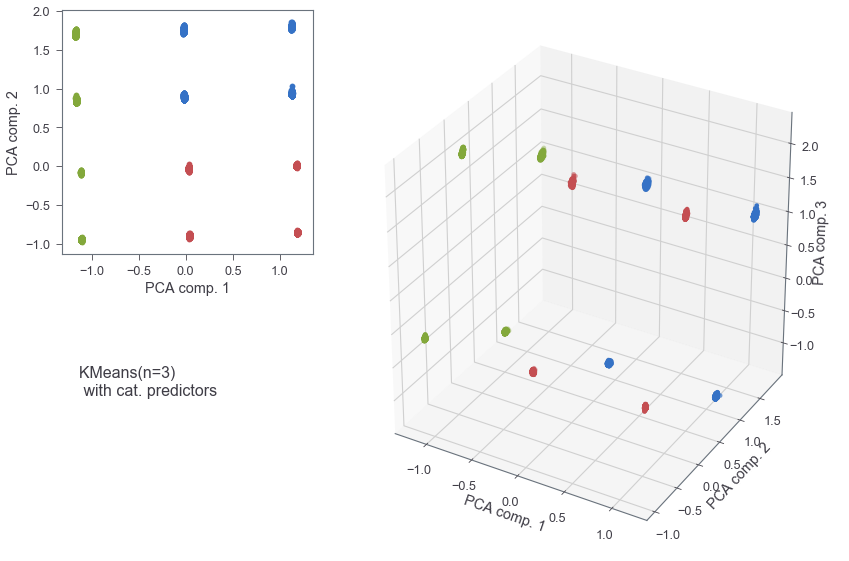

In [147]:
plot_func(data = scaled_traindata, 
          predicted_values=pred_3_cat, figsize=(12,8), text = 'KMeans(n=3) \n with cat. predictors')

In [148]:
sil_scores['sil_3_cat'] = silhouette_score(scaled_traindata, pred_3_cat)
sil_scores

{'sil_4_cat': 0.32235917927185564, 'sil_3_cat': 0.2913659715779018}

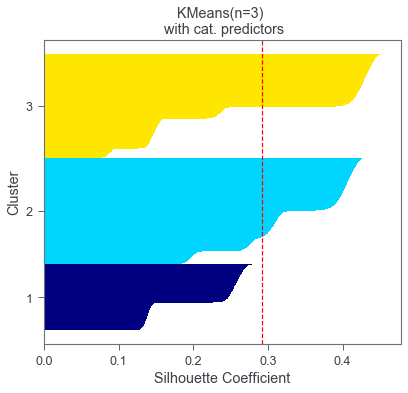

In [149]:
silhouette_plot(data = scaled_traindata, predicted_values=pred_3_cat, title = 'KMeans(n=3) \n with cat. predictors')

    * Mean value lower than for 4 clusters

##### Finding common elements between the clusters

In [151]:
np.vstack([np.unique(scaled_traindata[:,16:][pred_3_cat==i], axis=0) for i in range(3)]).shape[0]
# if value is equal to 16, no common particle charge and type combination between the clusters

16

    * No common particle charge and type combination between the clusters

##### Common elements within a cluster

In [153]:
common_feature(scaled_traindata, pred_3_cat, 3)

[[['type2', 'EE']], [['q1', '1'], ['q2', '-1']], [['type2', 'EB']]]

In [154]:
np.unique(scaled_traindata[:,16:][pred_3_cat==0], axis=0, return_counts=True)

(array([[0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0., 1., 0., 1.],
        [1., 0., 0., 1., 1., 0., 0., 1.],
        [1., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 0., 1.]]),
 array([169, 335, 462, 918, 170, 327]))

    * all 2nd particles of type 'EE'

In [155]:
np.unique(scaled_traindata[:,16:][pred_3_cat==1], axis=0, return_counts=True)

(array([[0., 1., 1., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1.],
        [0., 1., 1., 0., 1., 0., 1., 0.]]), array([ 471,  417, 1028, 1947]))

    * electron as the 1st particle and positron as the 2nd particle as given by the common_feature function

In [156]:
np.unique(scaled_traindata[:,16:][pred_3_cat==2], axis=0, return_counts=True)

(array([[0., 1., 0., 1., 0., 1., 1., 0.],
        [0., 1., 0., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1., 0., 1., 0.]]),
 array([ 166,  565,  402, 1946,  154,  523]))

    * all 2nd particles of type 'EB'

#### 2 clusters

In [157]:
pred_2_cat = KMeans(n_clusters=2).fit_predict(scaled_traindata)

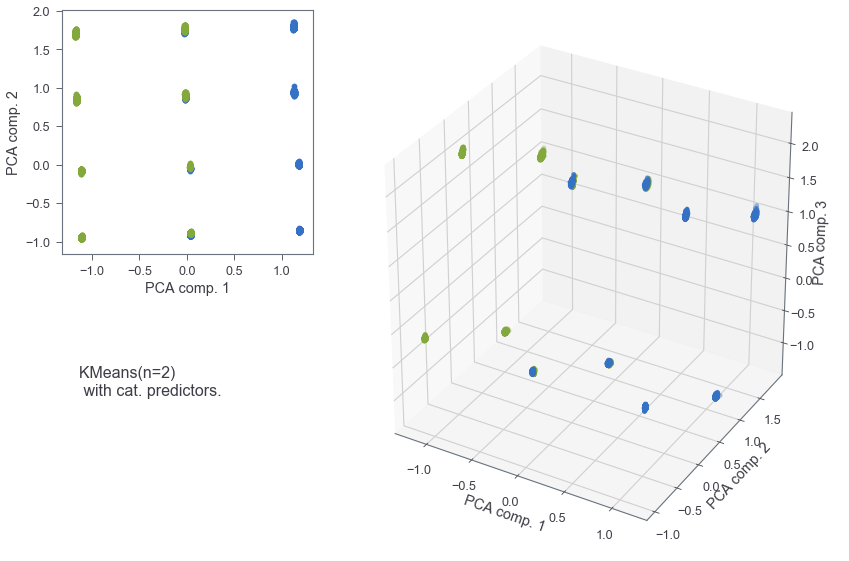

In [158]:
plot_func(data = scaled_traindata, 
          predicted_values=pred_2_cat, figsize=(12,8), text='KMeans(n=2) \n with cat. predictors.')

In [159]:
sil_scores['sil_2_cat'] = silhouette_score(scaled_traindata, pred_2_cat)
sil_scores

{'sil_4_cat': 0.32235917927185564,
 'sil_3_cat': 0.2913659715779018,
 'sil_2_cat': 0.29290228170330646}

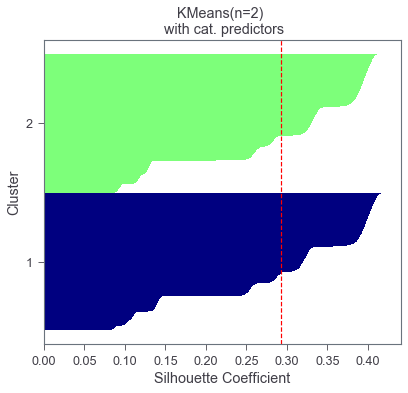

In [160]:
silhouette_plot(data = scaled_traindata, predicted_values=pred_2_cat, title = 'KMeans(n=2) \n with cat. predictors')

##### Finding common elements between the clusters

In [161]:
np.vstack([np.unique(scaled_traindata[:,16:][pred_2_cat==i], axis=0) for i in range(2)]).shape[0]

16

    * No common particle charge and type combination between the clusters

##### Common elements within a cluster

In [162]:
common_feature(scaled_traindata, pred_2_cat, 2)

[[['q2', '1']], [['q2', '-1']]]

In [163]:
np.unique(scaled_traindata[:,16:][pred_2_cat==0], axis=0, return_counts=True)

(array([[0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 0., 1., 1., 0.],
        [0., 1., 0., 1., 1., 0., 0., 1.],
        [0., 1., 0., 1., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0., 0., 1.],
        [1., 0., 0., 1., 1., 0., 1., 0.]]),
 array([ 169,  166,  335,  565,  462,  402,  918, 1946]))

    * Cluster 0 has all its 2nd particles as positrons

In [164]:
np.unique(scaled_traindata[:,16:][pred_2_cat==1], axis=0, return_counts=True)

(array([[0., 1., 1., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1.],
        [0., 1., 1., 0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0.]]),
 array([ 471,  417, 1028, 1947,  170,  154,  327,  523]))

    * Which means Cluster 1 has electrons

#### Testing KMeans (n=2) for different random initial configurations

In [165]:
for i in range(10):
    pred_rand_init = KMeans(n_clusters=2, init = 'random', n_jobs=3).fit_predict(scaled_traindata)
    print('Silhoutte score: %0.4f' %silhouette_score(scaled_traindata, pred_rand_init))
    print(common_feature(scaled_traindata, pred_rand_init,2), '\n')

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 

Silhoutte score: 0.2929
[[['q1', '1']], [['q1', '-1']]] 

Silhoutte score: 0.2929
[[['q1', '-1']], [['q1', '1']]] 

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 

Silhoutte score: 0.2929
[[['q2', '1']], [['q2', '-1']]] 



    * n=2 clusters gives interesting results. The clustering is based on the charge of one of the particles in the decay, i.e. one cluster has only positrons of the 1st or 2nd particle and the other cluster only electrons of the corresponding particle.  

### Clustering using data not including the categorical predictors, i.e. leaving out the q and type columns

#### Elbow Method for optimal clusters with data without the categorical predictors

In [166]:
distortion = []

for i in range(1,17,1):
    kmeans =KMeans(n_clusters=i, n_jobs=3)
    kmeans.fit(scaled_traindata[:,:16])
    distortion.append(kmeans.inertia_)

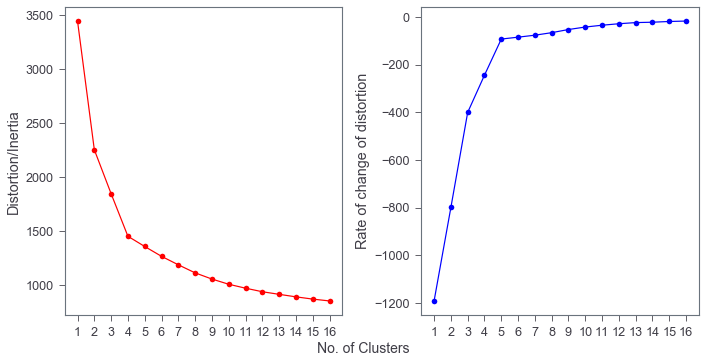

In [167]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, sharex = True, figsize=(10,5))
ax1[0].plot(range(1,17,1), distortion, marker = 'o', color = 'red')
ax1[1].plot(range(1,17,1), np.gradient(distortion, range(1,17,1)), marker = 'o', color = 'blue')
# ax1[0].set_xlabel('No. of Clusters')
# ax1[0].xaxis.set_label_coords(1.3, -0.1)
ax1[0].set_ylabel('Distortion/Inertia')
ax1[1].set_ylabel('Rate of change of distortion')
[i.set_xticks(range(1,17,1)) for i in ax1]
fig1.text(x = 0.45, y = 0, s='No. of Clusters', fontsize = 14)
fig1.tight_layout()
plt.show()

    * 2-5 clusters appear to be optimal

#### 2 clusters

In [170]:
pred_2_nocat = KMeans(n_clusters=2, n_jobs=3).fit_predict(scaled_traindata[:,:16])

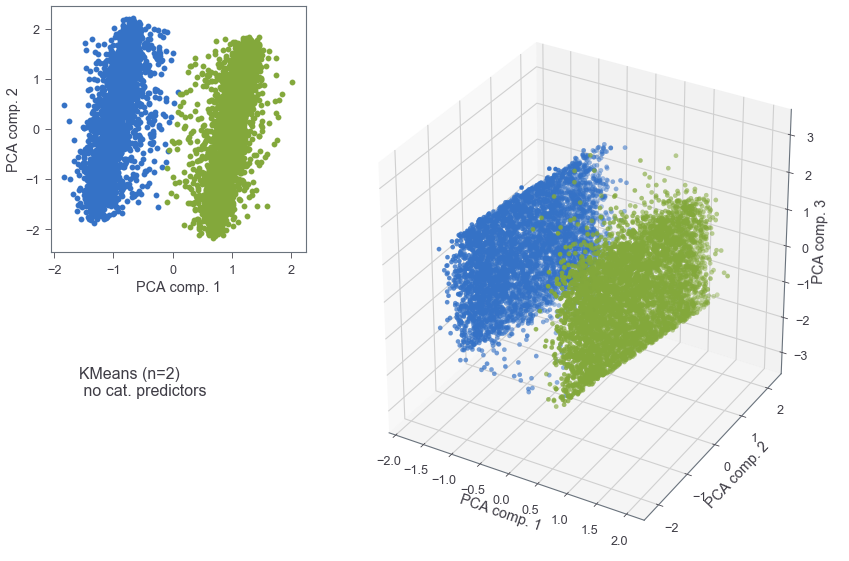

In [171]:
plot_func(data = scaled_traindata[:,:16], 
          predicted_values=pred_2_nocat, figsize=(12,8), text = 'KMeans (n=2) \n no cat. predictors')

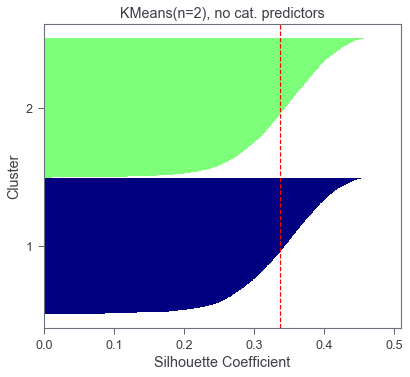

In [172]:
silhouette_plot(data = scaled_traindata[:,:16], predicted_values=pred_2_nocat, title = 'KMeans(n=2), no cat. predictors')

    * Clusters of similar sizes. 

In [173]:
sil_scores['sil_2_nocat'] = silhouette_score(scaled_traindata[:,:16], pred_2_nocat)
sil_scores

{'sil_4_cat': 0.32235917927185564,
 'sil_3_cat': 0.2913659715779018,
 'sil_2_cat': 0.29290228170330646,
 'sil_2_nocat': 0.33750207809707755}

##### Finding common elements between the clusters

In [174]:
np.vstack([np.unique(scaled_traindata[:,16:][pred_2_nocat==i], axis=0) for i in range(2)]).shape[0]

32

    *All types in both clusters

#### Plotting the distribution of counts of each combination amongst the clusters

###### Test Code

    Plotting bar graphs for each combination

In [401]:
cluster_labels_counts = [np.unique(scaled_traindata[:,16:][pred_2_nocat==i], axis=0, return_counts=True) for i in range(2)]
cluster_labels_counts

[(array([[0., 1., 0., 1., 0., 1., 0., 1.],
         [0., 1., 0., 1., 0., 1., 1., 0.],
         [0., 1., 0., 1., 1., 0., 0., 1.],
         [0., 1., 0., 1., 1., 0., 1., 0.],
         [0., 1., 1., 0., 0., 1., 0., 1.],
         [0., 1., 1., 0., 0., 1., 1., 0.],
         [0., 1., 1., 0., 1., 0., 0., 1.],
         [0., 1., 1., 0., 1., 0., 1., 0.],
         [1., 0., 0., 1., 0., 1., 0., 1.],
         [1., 0., 0., 1., 0., 1., 1., 0.],
         [1., 0., 0., 1., 1., 0., 0., 1.],
         [1., 0., 0., 1., 1., 0., 1., 0.],
         [1., 0., 1., 0., 0., 1., 0., 1.],
         [1., 0., 1., 0., 0., 1., 1., 0.],
         [1., 0., 1., 0., 1., 0., 0., 1.],
         [1., 0., 1., 0., 1., 0., 1., 0.]]),
  array([ 90,  82, 153, 293, 243, 224, 510, 959, 221, 219, 435, 949,  80,
          69, 150, 265])),
 (array([[0., 1., 0., 1., 0., 1., 0., 1.],
         [0., 1., 0., 1., 0., 1., 1., 0.],
         [0., 1., 0., 1., 1., 0., 0., 1.],
         [0., 1., 0., 1., 1., 0., 1., 0.],
         [0., 1., 1., 0., 0., 1., 0.,

In [402]:
counts = [i[1] for i in cluster_labels_counts]
counts

[array([ 90,  82, 153, 293, 243, 224, 510, 959, 221, 219, 435, 949,  80,
         69, 150, 265]),
 array([ 79,  84, 182, 272, 228, 193, 518, 988, 241, 183, 483, 997,  90,
         85, 177, 258])]

    16 combinations, so 16 bar plots

In [254]:
cluster_features = decode_fn(np.unique(scaled_traindata[:,16:][pred_2_nocat==0], axis=0))
cluster_features

array([['1', '1', 'EE', 'EE'],
       ['1', '1', 'EE', 'EB'],
       ['1', '1', 'EB', 'EE'],
       ['1', '1', 'EB', 'EB'],
       ['1', '-1', 'EE', 'EE'],
       ['1', '-1', 'EE', 'EB'],
       ['1', '-1', 'EB', 'EE'],
       ['1', '-1', 'EB', 'EB'],
       ['-1', '1', 'EE', 'EE'],
       ['-1', '1', 'EE', 'EB'],
       ['-1', '1', 'EB', 'EE'],
       ['-1', '1', 'EB', 'EB'],
       ['-1', '-1', 'EE', 'EE'],
       ['-1', '-1', 'EE', 'EB'],
       ['-1', '-1', 'EB', 'EE'],
       ['-1', '-1', 'EB', 'EB']], dtype='<U21')

In [200]:
counts

[array([ 90,  82, 153, 293, 243, 224, 510, 959, 221, 219, 435, 949,  80,
         69, 150, 265]),
 array([ 79,  84, 182, 272, 228, 193, 518, 988, 241, 183, 483, 997,  90,
         85, 177, 258])]

In [246]:
n_clusters = 2

bar_width = 0.25
bar_locations = [np.arange(-(n_clusters-1)/2*bar_width, stop = (n_clusters+1)/2*bar_width, step = bar_width) if n_clusters%2==1 else
                 np.arange(-(n_clusters-1)/2*bar_width, stop = n_clusters/2*bar_width, step = bar_width)]
bar_locations = bar_locations[0]
bar_locations

array([-0.125,  0.125])

In [212]:
cluster_labels-0.25

array([-0.25,  0.75,  1.75,  2.75,  3.75,  4.75,  5.75,  6.75,  7.75,
        8.75,  9.75, 10.75, 11.75, 12.75, 13.75, 14.75])

In [310]:
cluster_list.index(cluster_list[9])

9

In [315]:
str(cluster_list.index(cluster_list[9]))

'9'

In [330]:
test = [i[0]+'\n' for i in cluster_list]
test

['1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n']

In [335]:
str1 = ''
[str1+s for s in test]

['1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n',
 '-1\n']

In [337]:
str2 = ''
for s in test:
    str2 = str2 + s
    
str2

'1\n1\n1\n1\n1\n1\n1\n1\n-1\n-1\n-1\n-1\n-1\n-1\n-1\n-1\n'

In [392]:
cluster_list = cluster_features.tolist()
cluster_list

[['1', '1', 'EE', 'EE'],
 ['1', '1', 'EE', 'EB'],
 ['1', '1', 'EB', 'EE'],
 ['1', '1', 'EB', 'EB'],
 ['1', '-1', 'EE', 'EE'],
 ['1', '-1', 'EE', 'EB'],
 ['1', '-1', 'EB', 'EE'],
 ['1', '-1', 'EB', 'EB'],
 ['-1', '1', 'EE', 'EE'],
 ['-1', '1', 'EE', 'EB'],
 ['-1', '1', 'EB', 'EE'],
 ['-1', '1', 'EB', 'EB'],
 ['-1', '-1', 'EE', 'EE'],
 ['-1', '-1', 'EE', 'EB'],
 ['-1', '-1', 'EB', 'EE'],
 ['-1', '-1', 'EB', 'EB']]

In [393]:
for i in cluster_list:
    i.insert(0, str(cluster_list.index(i)) + ': ')
cluster_list

[['0: ', '1', '1', 'EE', 'EE'],
 ['1: ', '1', '1', 'EE', 'EB'],
 ['2: ', '1', '1', 'EB', 'EE'],
 ['3: ', '1', '1', 'EB', 'EB'],
 ['4: ', '1', '-1', 'EE', 'EE'],
 ['5: ', '1', '-1', 'EE', 'EB'],
 ['6: ', '1', '-1', 'EB', 'EE'],
 ['7: ', '1', '-1', 'EB', 'EB'],
 ['8: ', '-1', '1', 'EE', 'EE'],
 ['9: ', '-1', '1', 'EE', 'EB'],
 ['10: ', '-1', '1', 'EB', 'EE'],
 ['11: ', '-1', '1', 'EB', 'EB'],
 ['12: ', '-1', '-1', 'EE', 'EE'],
 ['13: ', '-1', '-1', 'EE', 'EB'],
 ['14: ', '-1', '-1', 'EB', 'EE'],
 ['15: ', '-1', '-1', 'EB', 'EB']]

In [396]:
for j in cluster_list:
    j[-1] = j[-1]+'\n'
cluster_list

[['0: ', '1', '1', 'EE', 'EE\n'],
 ['1: ', '1', '1', 'EE', 'EB\n'],
 ['2: ', '1', '1', 'EB', 'EE\n'],
 ['3: ', '1', '1', 'EB', 'EB\n'],
 ['4: ', '1', '-1', 'EE', 'EE\n'],
 ['5: ', '1', '-1', 'EE', 'EB\n'],
 ['6: ', '1', '-1', 'EB', 'EE\n'],
 ['7: ', '1', '-1', 'EB', 'EB\n'],
 ['8: ', '-1', '1', 'EE', 'EE\n'],
 ['9: ', '-1', '1', 'EE', 'EB\n'],
 ['10: ', '-1', '1', 'EB', 'EE\n'],
 ['11: ', '-1', '1', 'EB', 'EB\n'],
 ['12: ', '-1', '-1', 'EE', 'EE\n'],
 ['13: ', '-1', '-1', 'EE', 'EB\n'],
 ['14: ', '-1', '-1', 'EB', 'EE\n'],
 ['15: ', '-1', '-1', 'EB', 'EB\n']]

In [397]:
fig_text_test = ''
for s in np.array(cluster_list).flatten():
    fig_text_test = fig_text_test+s
fig_text_test

'0: 11EEEE\n1: 11EEEB\n2: 11EBEE\n3: 11EBEB\n4: 1-1EEEE\n5: 1-1EEEB\n6: 1-1EBEE\n7: 1-1EBEB\n8: -11EEEE\n9: -11EEEB\n10: -11EBEE\n11: -11EBEB\n12: -1-1EEEE\n13: -1-1EEEB\n14: -1-1EBEE\n15: -1-1EBEB\n'

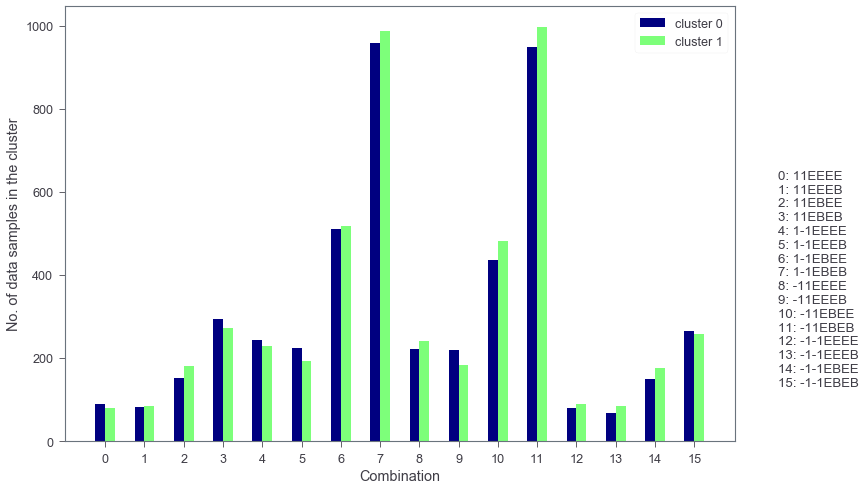

In [398]:
fig_test, ax_test = plt.subplots(1,1, figsize=(12,8))

n_clusters = 2
bar_width = 0.25
bar_locations = [np.arange(-(n_clusters-1)/2*bar_width, stop = (n_clusters+1)/2*bar_width, step = bar_width) if n_clusters%2==1 else
                 np.arange(-(n_clusters-1)/2*bar_width, stop = n_clusters/2*bar_width, step = bar_width)][0]

cluster_labels = np.arange(0,16)


for i in range(2):
    
    color =  cm.jet(i/n_clusters)

    ax_test.bar(cluster_labels + bar_locations[i], counts[i], color= color, width = bar_width, label = 'cluster %d'%(i))
    
ax_test.legend(loc = 'best')
ax_test.set_xticks(cluster_labels)

ax_test.set_xlabel('Combination')
ax_test.set_ylabel('No. of data samples in the cluster')
fig_test.text( x=0.95, y =0.2, s =fig_text_test,  wrap =True)
plt.show()


In [429]:
del bar_width, bar_locations

###### End Test Code

In [435]:
def barplot_func(training_data, pred_val, n_clusters = 2, figsize = (12,8), bar_width=0.25, textloc = (0.99,0.2),
                title = 'Clustering', title_loc = (0.5,1)):
    
    cluster_labels_counts = [np.unique(scaled_traindata[:,16:][pred_val==i], axis=0, return_counts=True) for i in range(n_clusters)]
    counts = [i[1] for i in cluster_labels_counts]
    cluster_features = decode_fn(cluster_labels_counts[0][0]).tolist()
    
    for i in cluster_features:
        i.insert(0, str(cluster_features.index(i)) + ': ')
    
    for j in cluster_features:
        j[-1] = j[-1]+'\n'
    
    fig_text = ''
    for s in np.array(cluster_features).flatten():
        fig_text = fig_text+s
    
    # Plotting
    fig, ax = plt.subplots(1,1, figsize=figsize)


    bar_locations = [np.arange(-(n_clusters-1)/2*bar_width, stop = (n_clusters+1)/2*bar_width, step = bar_width) if n_clusters%2==1 else
                     np.arange(-(n_clusters-1)/2*bar_width, stop = n_clusters/2*bar_width, step = bar_width)][0]

    cluster_labels = np.arange(0,16)


    for i in range(n_clusters):

        color =  cm.jet(i/n_clusters)
        ax.bar(cluster_labels + bar_locations[i], counts[i], color= color, width = bar_width, label = 'cluster %d'%(i))

    ax.legend(loc = 'best')
    ax.set_xticks(cluster_labels)

    ax.set_xlabel('Combination')
    ax.set_ylabel('No. of data samples in the cluster')
    
    fig.suptitle(x = 0.5, y=1.0, t=title)
    fig.text( x=textloc[0], y =textloc[1], s =fig_text)
    fig.tight_layout()
    plt.show()  
    

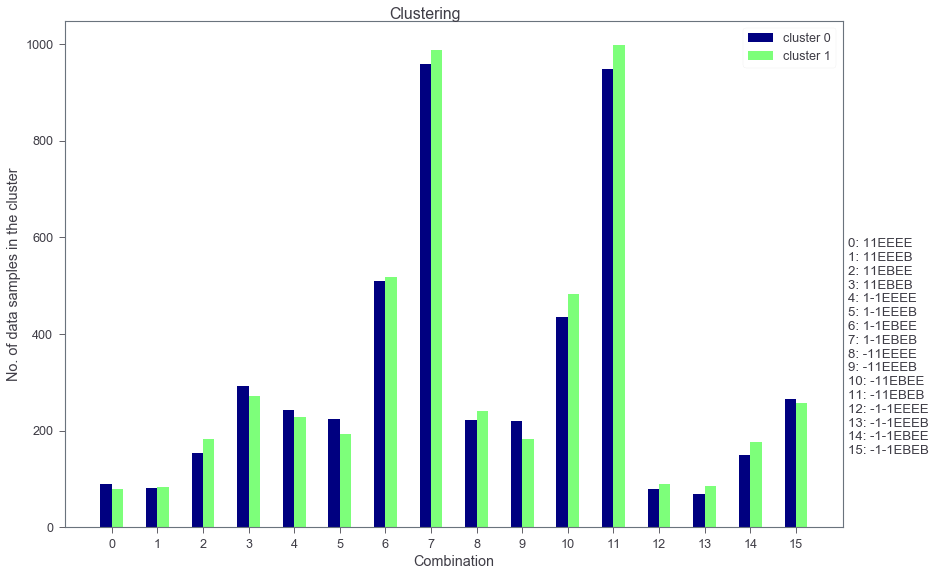

In [423]:
barplot_func(scaled_traindata, pred_2_nocat, 2, textloc=(0.99,0.2), title_loc=(0.5,1))

##### Common elements within a cluster

In [175]:
common_feature(scaled_traindata, pred_2_nocat, 2)

'No common particle charge/type combination within the clusters'

#### 3 clusters

In [424]:
pred_3_nocat = KMeans(n_clusters=3, n_jobs=3).fit_predict(scaled_traindata[:,:16])

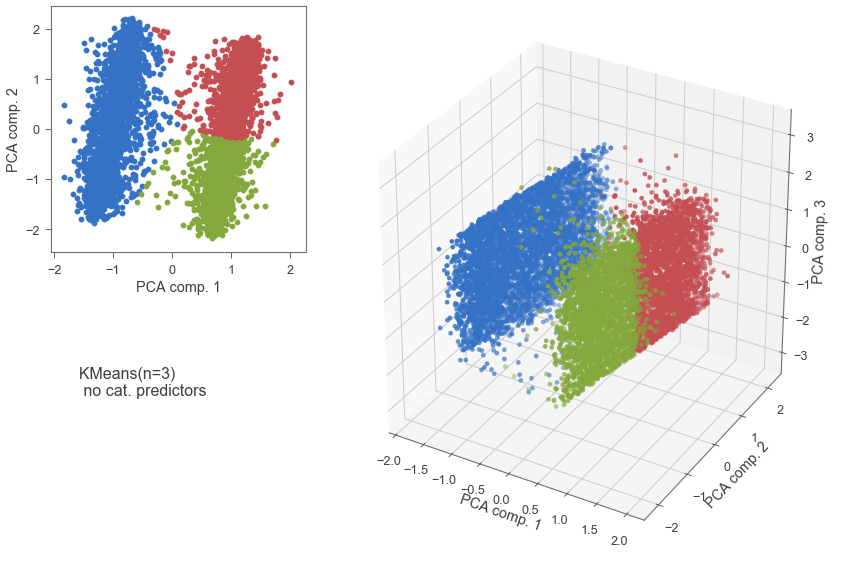

In [425]:
plot_func(data = scaled_traindata[:,:16], 
          predicted_values=pred_3_nocat, figsize=(12,8), text = 'KMeans(n=3) \n no cat. predictors')

    * PCA with 3 components could only resolve the data into 2 clusters with KMeans showing distinct boundaries.

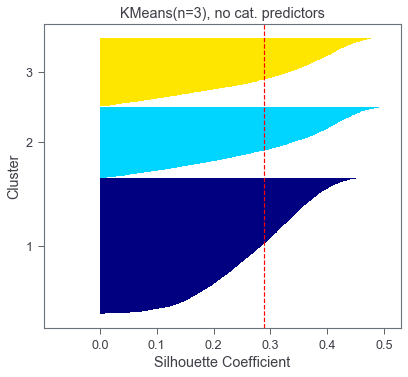

In [426]:
silhouette_plot(data = scaled_traindata[:,:16], predicted_values=pred_3_nocat, title = 'KMeans(n=3), no cat. predictors')

In [427]:
sil_scores['sil_3_nocat'] = silhouette_score(scaled_traindata[:,:16], pred_3_nocat)
sil_scores

{'sil_4_cat': 0.32235917927185564,
 'sil_3_cat': 0.2913659715779018,
 'sil_2_cat': 0.29290228170330646,
 'sil_2_nocat': 0.33750207809707755,
 'sil_3_nocat': 0.2881612262073114}

##### Finding common elements between the clusters

In [437]:
np.vstack([np.unique(scaled_traindata[:,16:][pred_3_nocat==i], axis=0) for i in range(3)]).shape[0]

48

    *All types in all clusters

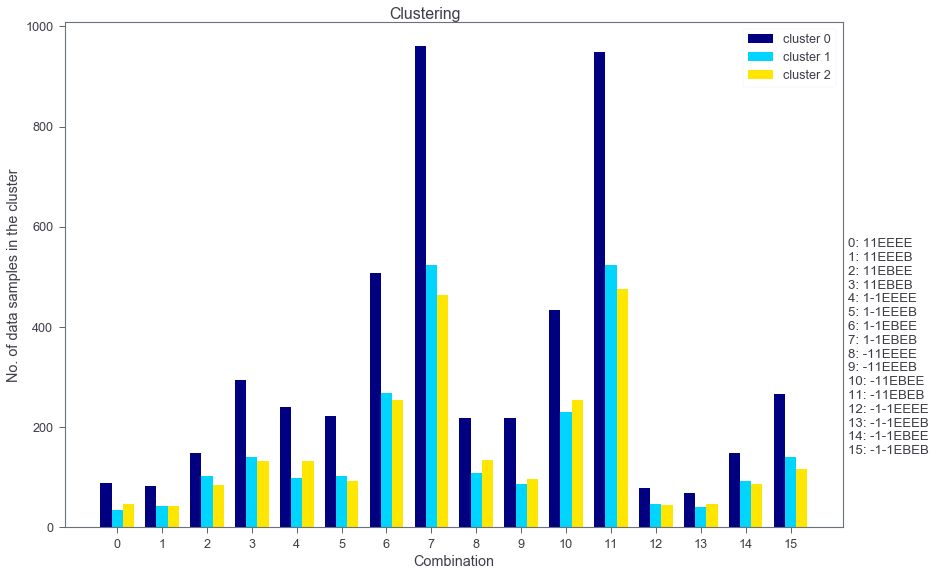

In [436]:
barplot_func(scaled_traindata, pred_3_nocat, n_clusters=3)

    * Cluster 0 has more counts of all types (seen in the PCA figure above)

##### Common elements within a cluster

In [438]:
common_feature(scaled_traindata, pred_3_nocat, 3)

'No common particle charge/type combination within the clusters'

#### 4 clusters

In [439]:
pred_4_nocat = KMeans(n_clusters=4, n_jobs=3).fit_predict(scaled_traindata[:,:16])

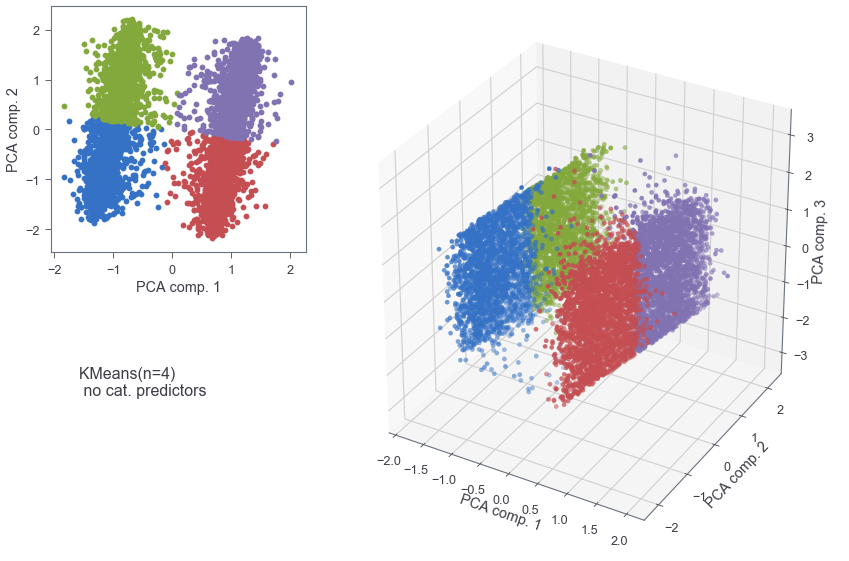

In [440]:
plot_func(scaled_traindata[:,:16], pred_4_nocat, figsize=(12,8), text = 'KMeans(n=4) \n no cat. predictors')

    * KMeans clustering without the categorical values also yields good clustering of the data.

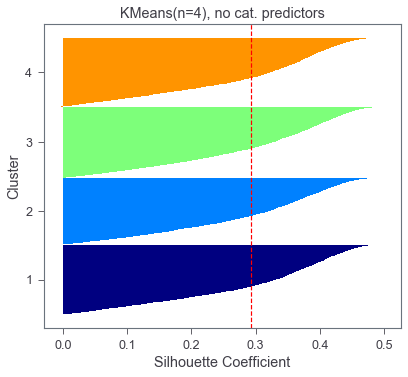

In [441]:
silhouette_plot(data = scaled_traindata[:,:16], predicted_values=pred_4_nocat, title = 'KMeans(n=4), no cat. predictors')

In [442]:
sil_scores['sil_4_nocat'] = silhouette_score(scaled_traindata[:,:16], pred_4_nocat)
sil_scores

{'sil_4_cat': 0.32235917927185564,
 'sil_3_cat': 0.2913659715779018,
 'sil_2_cat': 0.29290228170330646,
 'sil_2_nocat': 0.33750207809707755,
 'sil_3_nocat': 0.2881612262073114,
 'sil_4_nocat': 0.29251295817481815}

##### Finding common elements between the clusters

In [443]:
np.vstack([np.unique(scaled_traindata[:,16:][pred_4_nocat==i], axis=0) for i in range(4)]).shape[0]

64

    *All types in all clusters

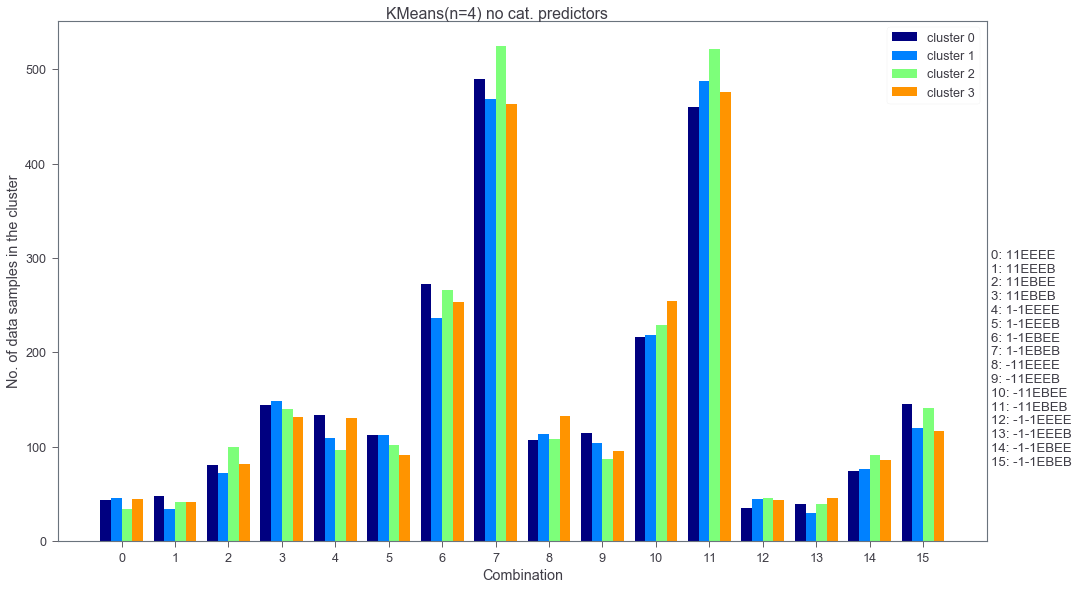

In [450]:
barplot_func(scaled_traindata, pred_4_nocat, n_clusters=4,figsize=(14,8.2), bar_width=0.2, title='KMeans(n=4) no cat. predictors')

##### Common elements within a cluster

In [451]:
common_feature(scaled_traindata, pred_4_nocat, 4)

'No common particle charge/type combination within the clusters'

#### 5 clusters

In [452]:
pred_5_nocat = KMeans(n_clusters=5, n_jobs=3).fit_predict(scaled_traindata[:,:16])

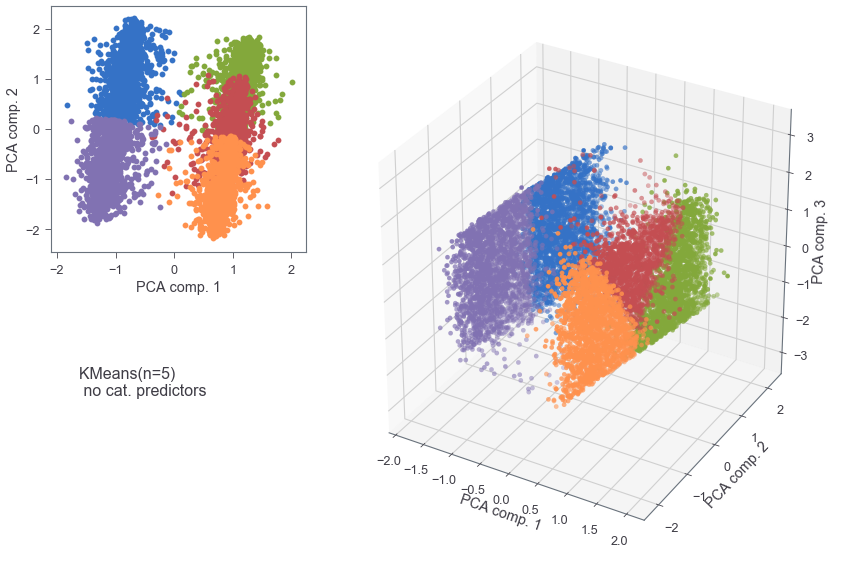

In [453]:
plot_func(scaled_traindata[:,:16], pred_5_nocat, figsize=(12,8), text = 'KMeans(n=5) \n no cat. predictors')

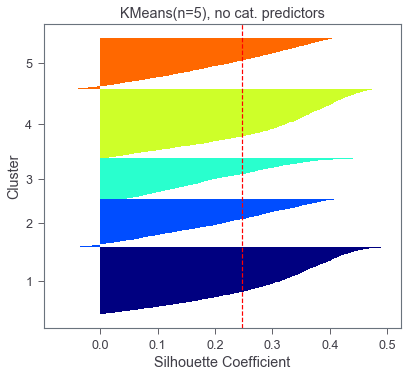

In [454]:
silhouette_plot(data = scaled_traindata[:,:16], predicted_values=pred_5_nocat, title = 'KMeans(n=5), no cat. predictors')

In [455]:
sil_scores['sil_5_nocat'] = silhouette_score(scaled_traindata[:,:16], pred_5_nocat)
sil_scores

{'sil_4_cat': 0.32235917927185564,
 'sil_3_cat': 0.2913659715779018,
 'sil_2_cat': 0.29290228170330646,
 'sil_2_nocat': 0.33750207809707755,
 'sil_3_nocat': 0.2881612262073114,
 'sil_4_nocat': 0.29251295817481815,
 'sil_5_nocat': 0.24750268156029898}

##### Finding common elements between the clusters

In [456]:
np.vstack([np.unique(scaled_traindata[:,16:][pred_5_nocat==i], axis=0) for i in range(5)]).shape

(76, 8)

    *Not all types are in all clusters

In [457]:
[len(np.unique(scaled_traindata[:,16:][pred_5_nocat==i], axis=0)) for i in range(5)]

[16, 16, 12, 16, 16]

##### Common elements within a cluster

In [458]:
common_feature(scaled_traindata, pred_5_nocat, 5)

'No common particle charge/type combination within the clusters'

##### *Testing*

In [459]:
# Ratio of counts of each combination in the clusters
np.unique(scaled_traindata[:,16:][pred_5_nocat==0], axis=0, return_counts=True)

(array([[0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 0., 1., 1., 0.],
        [0., 1., 0., 1., 1., 0., 0., 1.],
        [0., 1., 0., 1., 1., 0., 1., 0.],
        [0., 1., 1., 0., 0., 1., 0., 1.],
        [0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1.],
        [0., 1., 1., 0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0., 0., 1.],
        [1., 0., 0., 1., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0.]]),
 array([ 46,  34,  72, 148, 109, 111, 237, 466, 114, 104, 219, 487,  45,
         30,  76, 120]))

In [460]:
np.unique(scaled_traindata[:,16:][pred_5_nocat==2], axis=0, return_counts=True)

(array([[0., 1., 0., 1., 0., 1., 1., 0.],
        [0., 1., 0., 1., 1., 0., 0., 1.],
        [0., 1., 0., 1., 1., 0., 1., 0.],
        [0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1.],
        [0., 1., 1., 0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 1., 1., 0.],
        [1., 0., 0., 1., 1., 0., 0., 1.],
        [1., 0., 0., 1., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0.]]),
 array([ 14,   6, 139,  31,  40, 528,  24,  41, 511,  15,  12, 119]))

In [461]:
[np.unique(scaled_traindata[:,16:][pred_5_nocat==i], axis=0, return_counts=True)[1] for i in range(5)]

[array([ 46,  34,  72, 148, 109, 111, 237, 466, 114, 104, 219, 487,  45,
         30,  76, 120]),
 array([ 45,  35,  79,  59, 131,  73, 227, 206, 133,  78, 224, 223,  44,
         38,  77,  63]),
 array([ 14,   6, 139,  31,  40, 528,  24,  41, 511,  15,  12, 119]),
 array([ 44,  48,  81, 144, 134, 112, 271, 489, 107, 115, 215, 461,  35,
         39,  74, 145]),
 array([ 34,  35,  97,  75,  97,  90, 253, 258, 108,  81, 219, 264,  46,
         32,  88,  76])]

In [462]:
test = [np.unique(scaled_traindata[:,16:][pred_5_nocat==i], axis=0, return_counts=True)[1] for i in range(5)][1]
test

array([ 45,  35,  79,  59, 131,  73, 227, 206, 133,  78, 224, 223,  44,
        38,  77,  63])

In [463]:
np.pad(test, (0,4), 'constant', constant_values = (0,0))

array([ 45,  35,  79,  59, 131,  73, 227, 206, 133,  78, 224, 223,  44,
        38,  77,  63,   0,   0,   0,   0])

In [469]:
test0 = np.unique(scaled_traindata[:,16:][pred_5_nocat==0], axis=0, return_counts=True)
test1 = np.unique(scaled_traindata[:,16:][pred_5_nocat==2], axis=0, return_counts=True)
test2 = np.unique(scaled_traindata[:,16:][pred_5_nocat==3], axis=0, return_counts=True)

In [470]:
np.equal(test0[0], test2[0])

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  Tr

In [471]:
np.equal(test0[0][:12], test1[0])

array([[ True,  True,  True,  True,  True,  True, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True,  True,  True,  True,  True, False, False],
       [ True,  True, False, False, False, False,  True,  True],
       [ True,  True,  True,  True, False, False,  True,  True],
       [ True,  True,  True,  True, False, False,  True,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False,  True,  True, False, False],
       [ True,  True,  True,  True, False, False, False, False],
       [ True,  True, False, False,  True,  True,  True,  True],
       [ True,  True, False, False,  True,  True,  True,  True],
       [ True,  True, False, False,  True,  True,  True,  True]])

In [472]:
[np.all(test0[0] == test1[0][i], axis=1) for i in range(12)]

[array([False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False,  Tru

In [473]:
np.where(np.all(test0[0] == test1[0][0], axis=1))

(array([1]),)

In [474]:
np.argwhere(np.all(test0[0] == test1[0][0], axis=1))

array([[1]])

In [475]:
[np.argwhere(np.all(test0[0] == test1[0][i], axis=1)).ravel().tolist() for i in range(12)]

[[1], [2], [3], [5], [6], [7], [9], [10], [11], [13], [14], [15]]

In [476]:
np.isin(np.arange(0,16), [np.argwhere(np.all(test0[0] == test1[0][i], axis=1)).ravel().tolist()[0] for i in range(12)],
       invert=True)

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False])

In [477]:
test_zeros = np.zeros(shape = (16,), dtype = np.int32)
test_zeros[np.isin(np.arange(0,16), [np.argwhere(np.all(test0[0] == test1[0][i], axis=1)).ravel().tolist()[0] 
                                                   for i in range(12)])] = test1[1]
test_zeros

array([  0,  14,   6, 139,   0,  31,  40, 528,   0,  24,  41, 511,   0,
        15,  12, 119], dtype=int32)

In [478]:
np.where(test1[0] == test0[0])

/home/sameer/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

In [480]:
def uniforming_func(predicted_values = np.array([]), n_clusters = 2):
    
    unique_elems = [list(np.unique(scaled_traindata[:,16:][predicted_values==i], axis=0, return_counts=True))
                    for i in range(n_clusters)]
    # need to convert to list as np.unique returns tuple which is immutable
    
    type_counts = [len(i[1]) for i in unique_elems]
    
    type_counts_len, type_counts_idx = np.unique(type_counts, return_index=True)
    
    if type_counts_len.size == 1:
        return 'All clusters have the same number of particle charge and type combinations.'
    
    for i, counts in zip(type_counts_idx[0:-1], type_counts_len):
        relative_indices = [np.argwhere(np.all(unique_elems[type_counts_idx[-1]][0] == 
                            unique_elems[i][0][j], axis=1)).ravel().tolist()[0] for j in range(counts)]
        
        mask_arr = np.isin(np.arange(16), relative_indices)
        
        temp_elems = np.zeros(shape = unique_elems[type_counts_idx[-1]][0].shape, 
                              dtype = unique_elems[type_counts_idx[-1]][0].dtype)
        temp_elems[mask_arr] = unique_elems[i][0]
        missing_idx_mask = np.logical_not(mask_arr)
        temp_elems[missing_idx_mask] = unique_elems[type_counts_idx[-1]][0][missing_idx_mask]
        
        temp_counts = np.zeros(shape = (16,), dtype = unique_elems[type_counts_idx[-1]][1].dtype)       
        temp_counts[mask_arr] = unique_elems[i][1]          
        
        unique_elems[i][0] = temp_elems
        unique_elems[i][1] = temp_counts
    
    
    count_list = [i[1].tolist() for i in unique_elems]
    return count_list, unique_elems

In [481]:
unique_elems = [np.unique(scaled_traindata[:,16:][pred_5_nocat==i], axis=0, return_counts=True) for i in range(5)]
type_counts = [len(i[1]) for i in unique_elems]
type_counts

[16, 16, 12, 16, 16]

In [483]:
type_counts_len, type_counts_idx = np.unique(type_counts, return_index=True)
type_counts_len, type_counts_idx

(array([12, 16]), array([2, 0]))

In [484]:
unique_elems[type_counts_idx[-1]][0].dtype

dtype('float64')

In [485]:
unique_elems[type_counts_idx[-1]][0]

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

In [486]:
np.unique(type_counts, return_index=True)

(array([12, 16]), array([2, 0]))

In [487]:
np.unique([len(np.unique(scaled_traindata[:,16:][pred_5_nocat==i], axis=0)) for i in range(5)], return_index=True)[1][0:-1]

array([2])

In [497]:
# np.logical_not(np.isin(np.arange(16), relative_indices))

In [490]:
count_list, _ = uniforming_func(pred_5_nocat,5)
count_list

[[46, 34, 72, 148, 109, 111, 237, 466, 114, 104, 219, 487, 45, 30, 76, 120],
 [45, 35, 79, 59, 131, 73, 227, 206, 133, 78, 224, 223, 44, 38, 77, 63],
 [0, 14, 6, 139, 0, 31, 40, 528, 0, 24, 41, 511, 0, 15, 12, 119],
 [44, 48, 81, 144, 134, 112, 271, 489, 107, 115, 215, 461, 35, 39, 74, 145],
 [34, 35, 97, 75, 97, 90, 253, 258, 108, 81, 219, 264, 46, 32, 88, 76]]

In [491]:
count_list, _ = uniforming_func(pred_5_nocat,5)
np.array(count_list).shape

(5, 16)

In [492]:
uniforming_func(pred_3_nocat,3)

'All clusters have the same number of particle charge and type combinations.'

In [494]:
np.unique(uniforming_func(pred_5_nocat,5)[0], axis=0).shape

(5, 16)

In [495]:
uniforming_func(pred_5_nocat,5)[1] ==  unique_elems[0][0]

/home/sameer/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [498]:
# np.all(uniforming_func(pred_5_nocat,5)[1] ==  unique_elems[0][0], axis=1)

###### End Test Code

### Saving the scaled data for future imports

In [113]:
np.hstack((zee_edited.columns, enc_charge.get_feature_names(), enc_type.get_feature_names()))

array(['pt1', 'eta1', 'phi1', 'sigmaEtaEta1', 'HoverE1', 'isoTrack1',
       'isoEcal1', 'isoHcal1', 'pt2', 'eta2', 'phi2', 'sigmaEtaEta2',
       'HoverE2', 'isoTrack2', 'isoEcal2', 'isoHcal2', 'x0_-1', 'x0_1',
       'x0_EB', 'x0_EE'], dtype=object)

In [114]:
np.savez_compressed('scaled_traindata.npz', scaled_data = scaled_traindata, 
                    arr_names = np.hstack((zee_edited.columns, enc_charge.get_feature_names(), enc_type.get_feature_names())))

In [115]:
del scaled_traindata